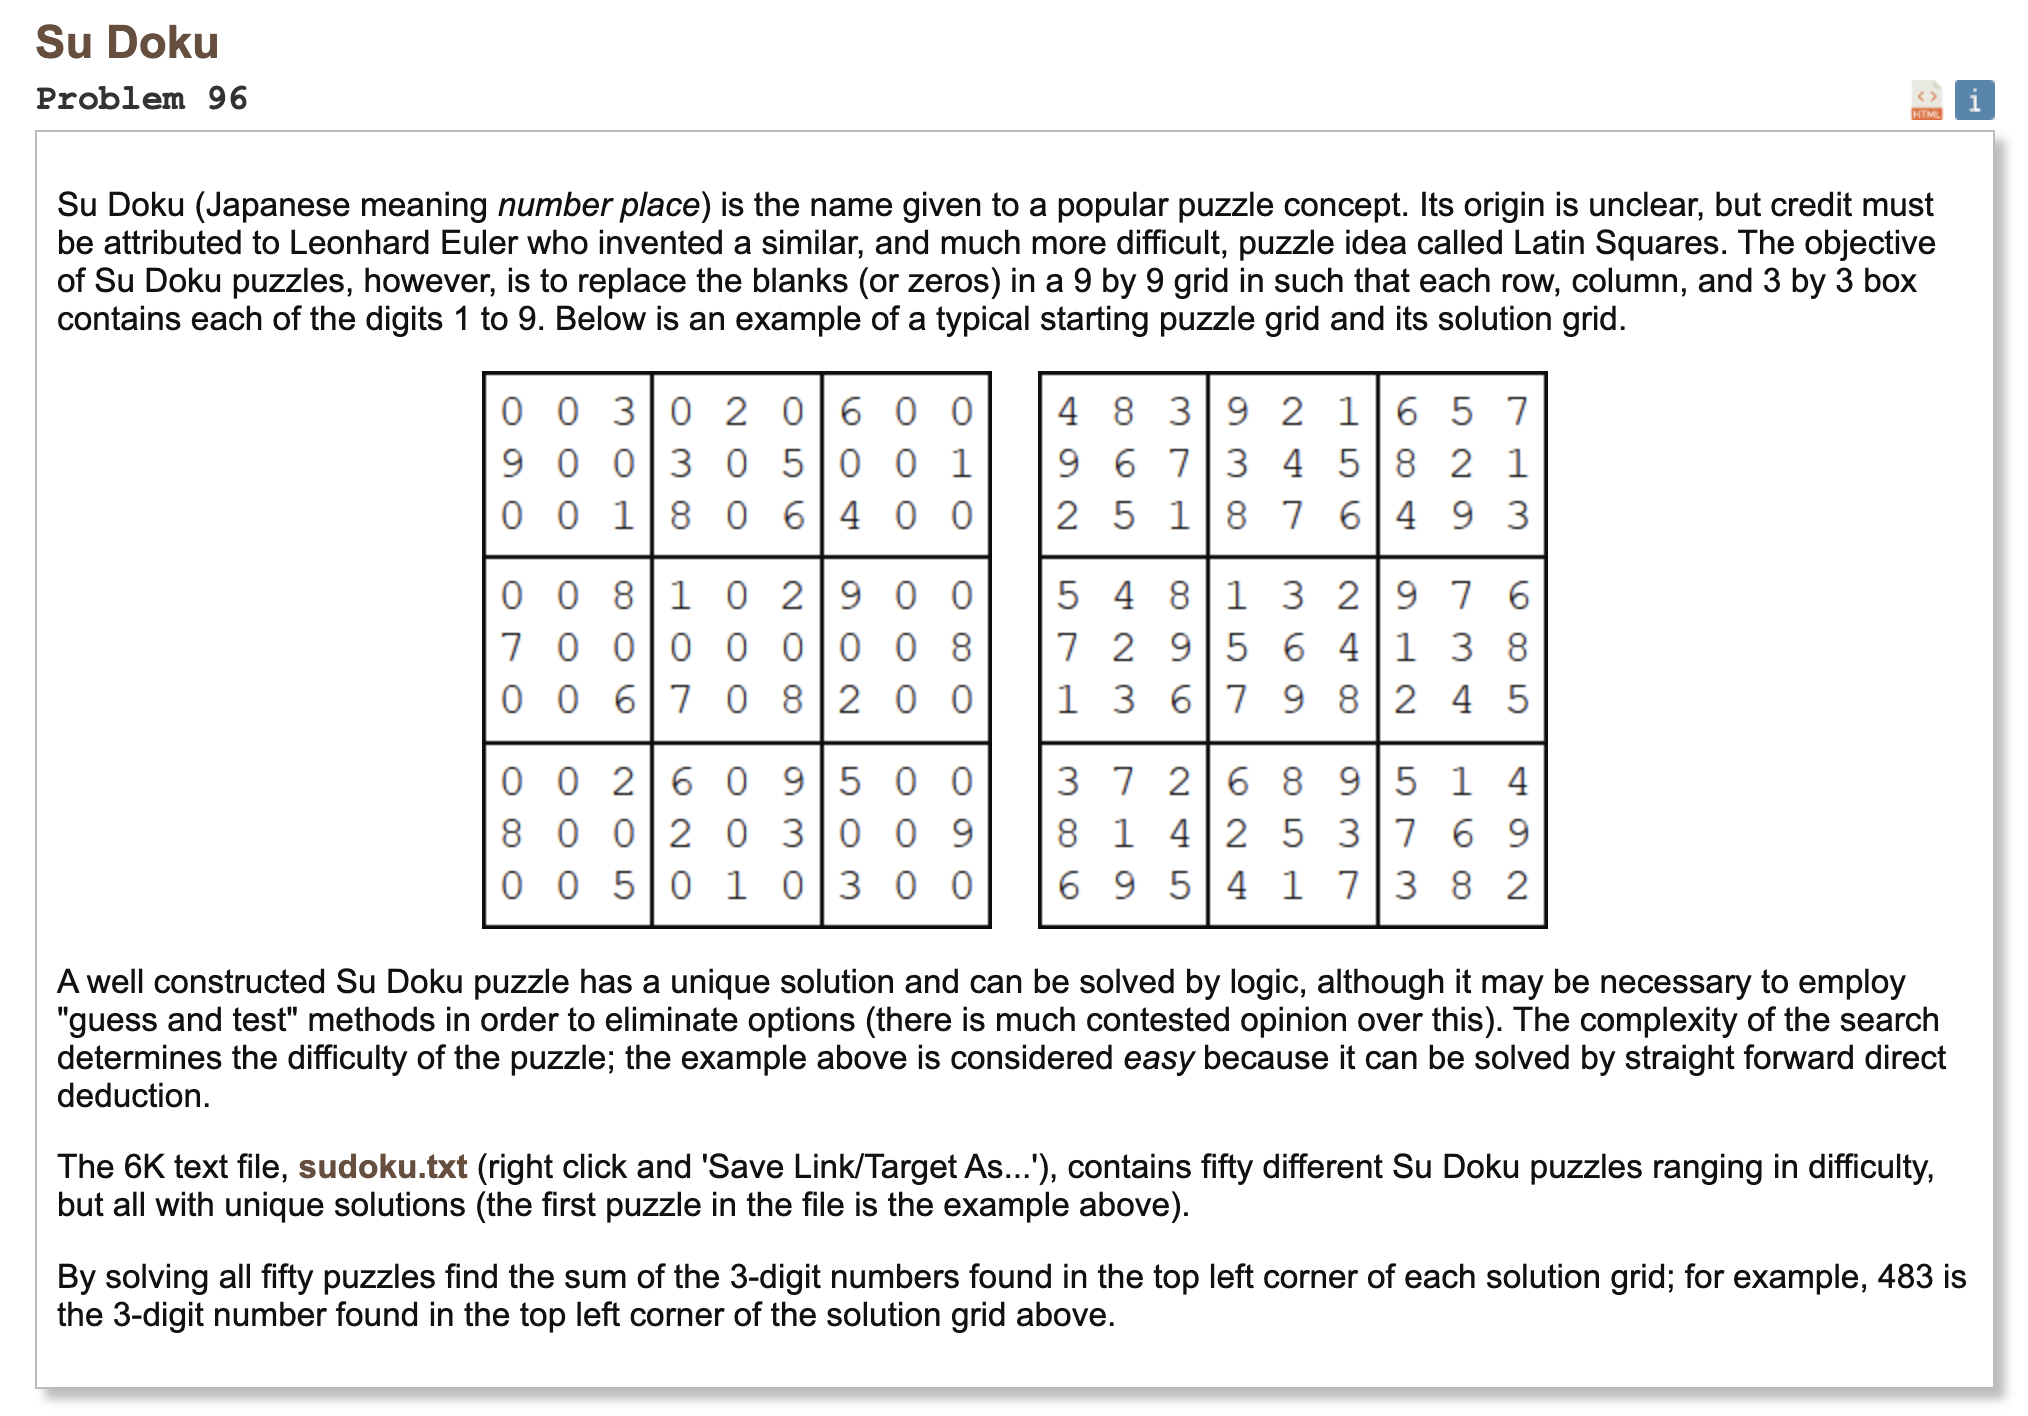

## Initial approach

* minimize the problem to understand.
* lets see grid 01

Grid 01  
003020600  
900305001  
001806400  
008102900  
700000008  
006708200  
002609500  
800203009  
005010300  

As a starting point:

* check each 3x3 for most numbers than 0
* check each row for most numbers than 0
* check each column for most numbers than 0

In [1]:
import numpy as np

grid_str = """
003020600
900305001
001806400
008102900
700000008
006708200
002609500
800203009
005010300
"""

grid = np.array([[int(c) for c in line] for line in grid_str.strip().splitlines()])

# 1. Check 3x3 boxes
max_count_box = 0
max_box_index = (0, 0)
for i in range(3):
    for j in range(3):
        box = grid[i*3:(i+1)*3, j*3:(j+1)*3]
        count = np.count_nonzero(box)
        if count > max_count_box:
            max_count_box = count
            max_box_index = (i, j)

# 2. Check rows
nonzero_counts_rows = np.count_nonzero(grid, axis=1)
max_row_index = np.argmax(nonzero_counts_rows)
max_row_count = nonzero_counts_rows[max_row_index]

# 3. Check columns
nonzero_counts_cols = np.count_nonzero(grid, axis=0)
max_col_index = np.argmax(nonzero_counts_cols)
max_col_count = nonzero_counts_cols[max_col_index]

print("3x3 box with most non-zero numbers:", max_box_index, "→", max_count_box)
print("Row with most non-zero numbers:", max_row_index, "→", max_row_count)
print("Column with most non-zero numbers:", max_col_index, "→", max_col_count)

3x3 box with most non-zero numbers: (0, 1) → 5
Row with most non-zero numbers: 1 → 4
Column with most non-zero numbers: 2 → 6


* we need to try all numbers from 1 to 9
* it shouldn't be already in the same row
* it shouldn't be in the same column
* it shouldn't be in the same 3x3 box
* if number is valid, place it and go to next "0"
* stop when fully filled

In [2]:
def is_valid(grid, row, col, num):
    if num in grid[row]:
        return False
    if num in grid[:, col]:
        return False
    box_row, box_col = 3 * (row // 3), 3 * (col // 3)
    if num in grid[box_row:box_row+3, box_col:box_col+3]:
        return False
    return True

def find_empty(grid):
    for i in range(9):
        for j in range(9):
            if grid[i, j] == 0:
                return i, j
    return None

def solve(grid):
    empty = find_empty(grid)
    if not empty:
        return True
    row, col = empty
    for num in range(1, 10):
        if is_valid(grid, row, col, num):
            grid[row, col] = num
            if solve(grid):
                return True
            grid[row, col] = 0
    return False

In [3]:
if solve(grid):
    print(grid)
else:
    print("No solution found.")

[[4 8 3 9 2 1 6 5 7]
 [9 6 7 3 4 5 8 2 1]
 [2 5 1 8 7 6 4 9 3]
 [5 4 8 1 3 2 9 7 6]
 [7 2 9 5 6 4 1 3 8]
 [1 3 6 7 9 8 2 4 5]
 [3 7 2 6 8 9 5 1 4]
 [8 1 4 2 5 3 7 6 9]
 [6 9 5 4 1 7 3 8 2]]


* Now apply it to all 50 grids

In [4]:
with open("p096_sudoku.txt") as f:
    lines = [line.strip() for line in f if line.strip()]

sudoku_grids = []
for i in range(0, len(lines), 10):
    grid_lines = lines[i+1:i+10]
    grid = np.array([[int(c) for c in line] for line in grid_lines])
    sudoku_grids.append(grid)

for index, grid in enumerate(sudoku_grids[:5]):
    solve(grid)
    print(f"Grid {index + 1} solution:")
    print(grid)
    print()

Grid 1 solution:
[[4 8 3 9 2 1 6 5 7]
 [9 6 7 3 4 5 8 2 1]
 [2 5 1 8 7 6 4 9 3]
 [5 4 8 1 3 2 9 7 6]
 [7 2 9 5 6 4 1 3 8]
 [1 3 6 7 9 8 2 4 5]
 [3 7 2 6 8 9 5 1 4]
 [8 1 4 2 5 3 7 6 9]
 [6 9 5 4 1 7 3 8 2]]

Grid 2 solution:
[[2 4 5 9 8 1 3 7 6]
 [1 6 9 2 7 3 5 8 4]
 [8 3 7 5 6 4 2 1 9]
 [9 7 6 1 2 5 4 3 8]
 [5 1 3 4 9 8 6 2 7]
 [4 8 2 7 3 6 9 5 1]
 [3 9 1 6 5 7 8 4 2]
 [7 2 8 3 4 9 1 6 5]
 [6 5 4 8 1 2 7 9 3]]

Grid 3 solution:
[[4 6 2 8 3 1 9 5 7]
 [7 9 5 4 2 6 1 8 3]
 [3 8 1 7 9 5 4 2 6]
 [1 7 3 9 8 4 2 6 5]
 [6 5 9 3 1 2 7 4 8]
 [2 4 8 5 6 7 3 1 9]
 [9 2 6 1 7 8 5 3 4]
 [8 3 4 2 5 9 6 7 1]
 [5 1 7 6 4 3 8 9 2]]

Grid 4 solution:
[[1 3 7 2 5 6 8 4 9]
 [9 2 8 3 1 4 5 6 7]
 [4 6 5 8 9 7 3 1 2]
 [6 7 3 5 4 2 9 8 1]
 [8 1 9 6 7 3 2 5 4]
 [5 4 2 1 8 9 7 3 6]
 [2 5 6 7 3 1 4 9 8]
 [3 9 1 4 2 8 6 7 5]
 [7 8 4 9 6 5 1 2 3]]

Grid 5 solution:
[[5 2 3 8 1 6 7 4 9]
 [7 8 4 5 9 3 1 2 6]
 [6 9 1 4 7 2 8 3 5]
 [2 3 9 1 4 5 6 8 7]
 [4 5 7 2 6 8 9 1 3]
 [1 6 8 9 3 7 2 5 4]
 [3 4 2 7 8 9 5 6 1]
 [9 

* Now answer the question.

In [5]:
%%time

with open("p096_sudoku.txt") as f:
    lines = [line.strip() for line in f if line.strip()]

sudoku_grids = []
for i in range(0, len(lines), 10):
    grid_lines = lines[i+1:i+10]
    grid = np.array([[int(c) for c in line] for line in grid_lines])
    sudoku_grids.append(grid)

total = 0
for grid in sudoku_grids:
    solve(grid)
    top_left_number = grid[0, 0] * 100 + grid[0, 1] * 10 + grid[0, 2]
    total += top_left_number

print("Total of top-left 3-digit numbers:", total)

Total of top-left 3-digit numbers: 24702
CPU times: user 29.2 s, sys: 158 ms, total: 29.4 s
Wall time: 29.5 s
